In [1]:
import numpy as np
from pulse_designer import *
import matplotlib.pyplot as plt
import matplotlib

In [2]:
N = 9
omega_1 = -0.36 * np.pi
# omega_1 = 4 * np.pi / N
omega_0, alpha = w_solve_2(N, omega_1)

print(f'alpha = {alpha / np.pi} * pi')
print(f'omega_0 = {omega_0 / np.pi} * pi')

w = w_pulse(N, omega_0, alpha)

alpha = -0.13104689642260103 * pi
omega_0 = -0.10357470343741321 * pi


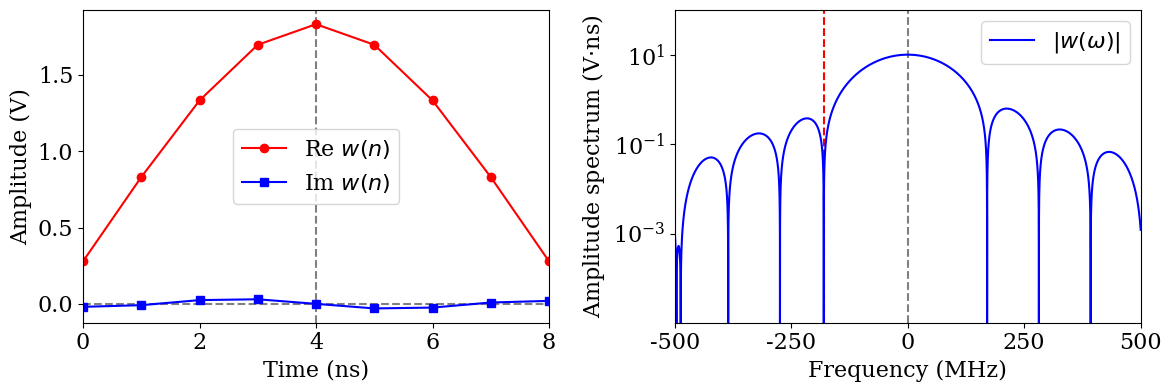

In [3]:
sampl_rate_Hz = 1e9
freq_res_Hz = 1e3

# matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.family'] = 'DejaVu Serif'
# matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 4.2))

ax = plt.subplot(1, 2, 1)
ax.plot(np.real(w), label=r'Re $w(n)$', color='r', marker='o', zorder=0.5)
ax.plot(np.imag(w), label=r'Im $w(n)$', color='b', marker='s', zorder=0.4)

ax.axhline(0, color='gray', linestyle='--', zorder=-np.inf)
ax.axvline(0.5 * len(w) - 0.5, color='gray', linestyle='--', zorder=-np.inf)

ax.set_xlim(0, len(w) - 1)

ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (V)')
ax.legend()

ax = plt.subplot(1, 2, 2)
freq, pulse_fft_pad = fft_tool(w, sampl_rate_Hz, freq_res_Hz)
freq_MHz = 1e-6 * freq

ax.axvline(0, color='gray', linestyle='--', zorder=-np.inf)
ax.axvline(-180, color='r', linestyle='--', zorder=-np.inf)

ax.plot(freq_MHz, np.abs(np.real(pulse_fft_pad)), color='b', label=r'$|w(\omega)|$', zorder=0.5)

nyquist_freq_MHz = 0.5e-6 * sampl_rate_Hz
ax.set_xlim(-nyquist_freq_MHz, nyquist_freq_MHz)

max_pulse_fft_pad = np.max(np.abs(np.real(pulse_fft_pad)))
ax.set_ylim(1e-6 * max_pulse_fft_pad, 10 * max_pulse_fft_pad)

plt.xticks([-500, -250, 0, 250, 500], [r'-500', r'-250', r'0', r'250', r'500'])

ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel(r'Amplitude spectrum (V$\cdot$ns)')
ax.set_yscale('log')
ax.legend()

fig.tight_layout()
plt.show()

In [4]:
fig.savefig(fname='figures/pulse_w.pdf')